In [16]:
# load necessary libraries
library(DBI)
library(caret)
library(gridExtra)
library(ggpubr)
library(reshape2)
library(ggplot2) 
library(forecast)

## Turn Off warnings
options( warn = -1 )

# process in parallel on Windows
#library(doParallel) 
#cl <- makeCluster(detectCores(), type='PSOCK')
#registerDoParallel(cl)

# For MAC OSX and Unix like System
library(doMC)
registerDoMC(cores = 4)

In [17]:
# Load the DataSets: Titanic training Data
dataSet <- read.csv("international-airline-passengers.csv", header = TRUE, sep = ',')
colnames(dataSet)

[1] "Month"     "Passenger"

Month,Passenger
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


,Month,Passenger
135,1960-03,419
136,1960-04,461
137,1960-05,472
138,1960-06,535
139,1960-07,622
140,1960-08,606
141,1960-09,508
142,1960-10,461
143,1960-11,390
144,1960-12,432


[1] 144   2


 factor integer 
      1       1 

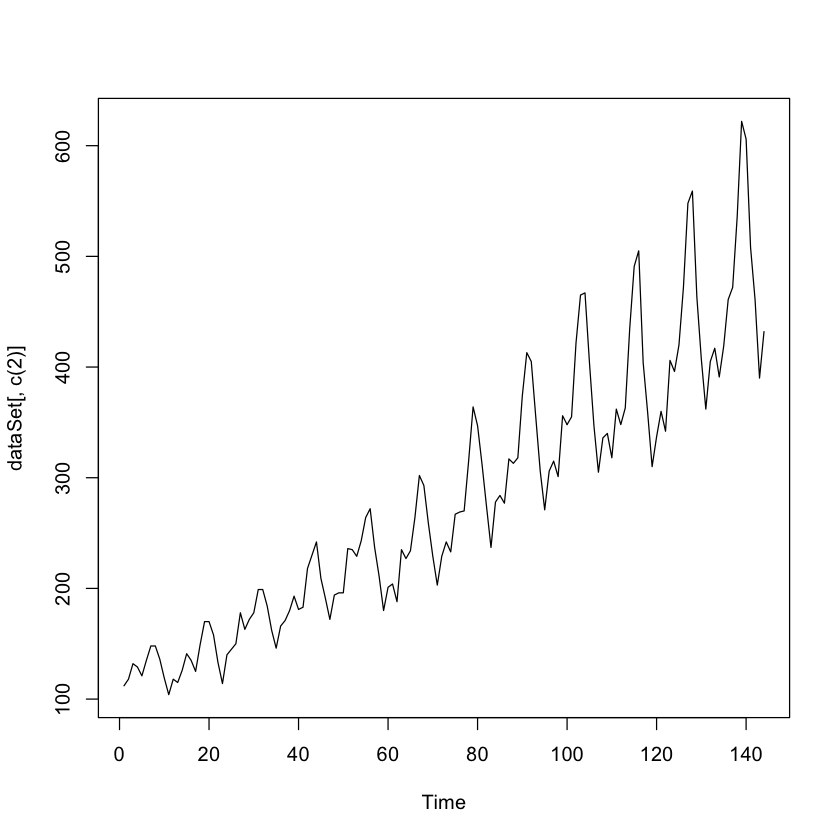

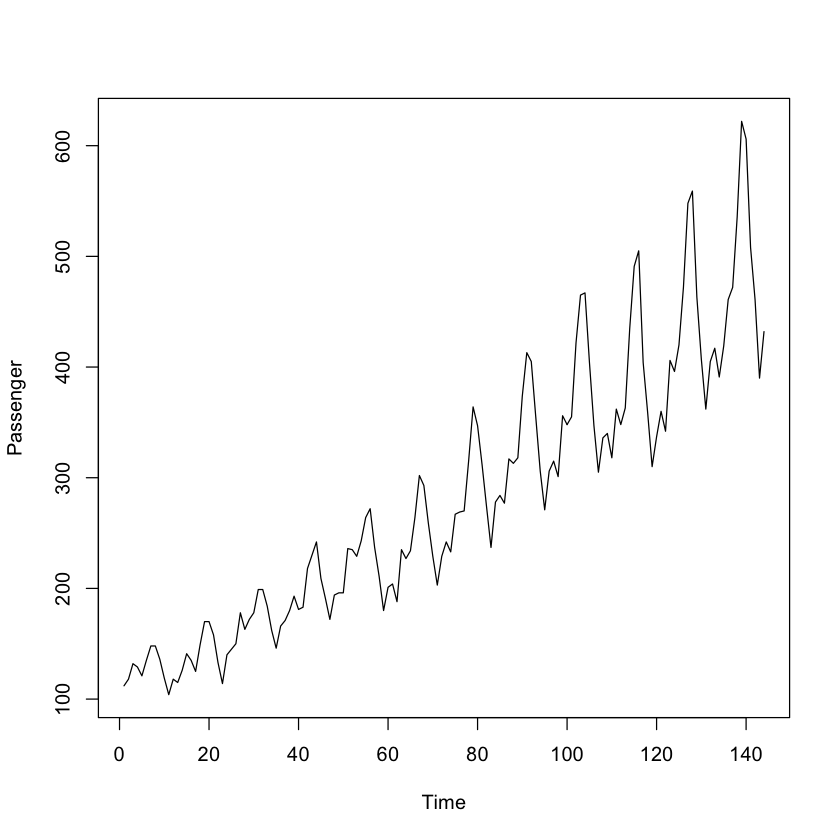

In [18]:
# Print top 10 rows in the dataSet
head(dataSet, 10)
# Print last 10 rows in the dataSet
tail(dataSet, 10)
# Dimention of Dataset
dim(dataSet)
# Check Data types of each column
table(unlist(lapply(dataSet, class)))

plot.ts(dataSet[, c(2)])
plot.ts(dataSet["Passenger"])

In [19]:
# Covert the dataset to a vactor i.e. creating "y" variable
dataSet  <- as.numeric(dataSet[, c("Passenger")])


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 52.323, df = 8, p-value = 1.458e-08

Model df: 2.   Total lags used: 10

[1] 0.9220033


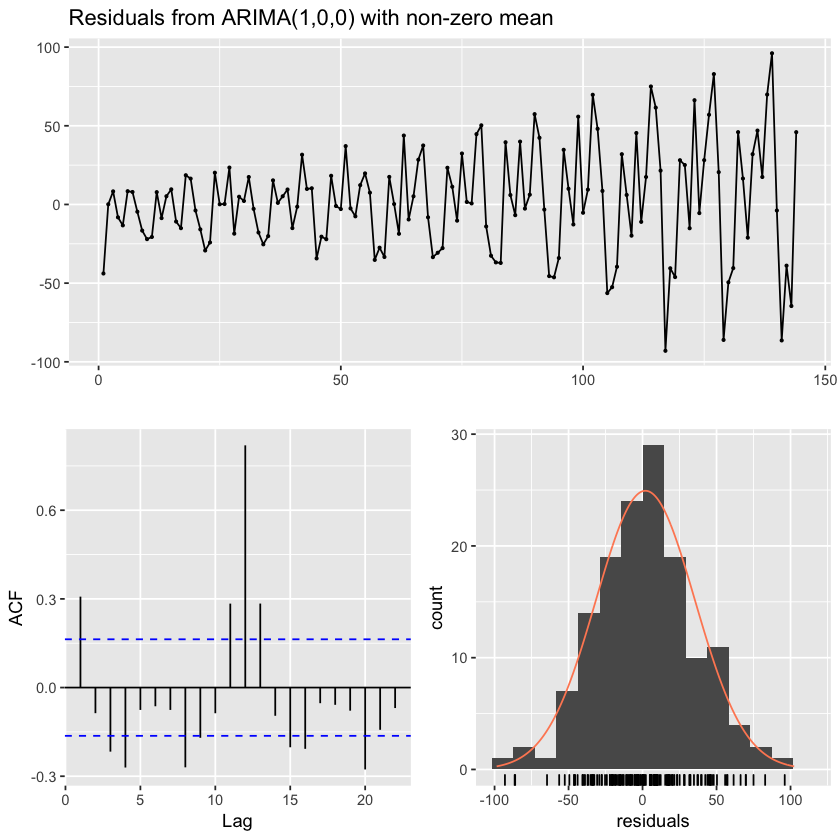

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
145       426.5698 383.7073 469.4322 361.0173 492.1223
146       421.3316 361.7772 480.8860 330.2510 512.4122
147       416.2787 344.6025 487.9549 306.6594 525.8979
148       411.4045 330.0553 492.7537 286.9917 535.8173
149       406.7027 317.2876 496.1177 269.9542 543.4512
150       402.1672 305.8515 498.4828 254.8651 549.4692
151       397.7921 295.4725 500.1117 241.3077 554.2764
152       393.5717 285.9658 501.1776 229.0026 558.1408
153       389.5006 277.1990 501.8022 217.7501 561.2511
154       385.5735 269.0723 502.0747 207.4003 563.7467
155       381.7853 261.5080 502.0626 197.8370 565.7335
156       378.1310 254.4435 501.8186 188.9673 567.2948
157       374.6061 247.8276 501.3845 180.7152 568.4969
158       371.2057 241.6174 500.7941 173.0174 569.3941
159       367.9257 235.7763 500.0751 165.8206 570.0308
160       364.7616 230.2730 499.2503 159.0789 570.4443
161       361.7095 225.0800 498.3389 152.7528 570.6662
162       

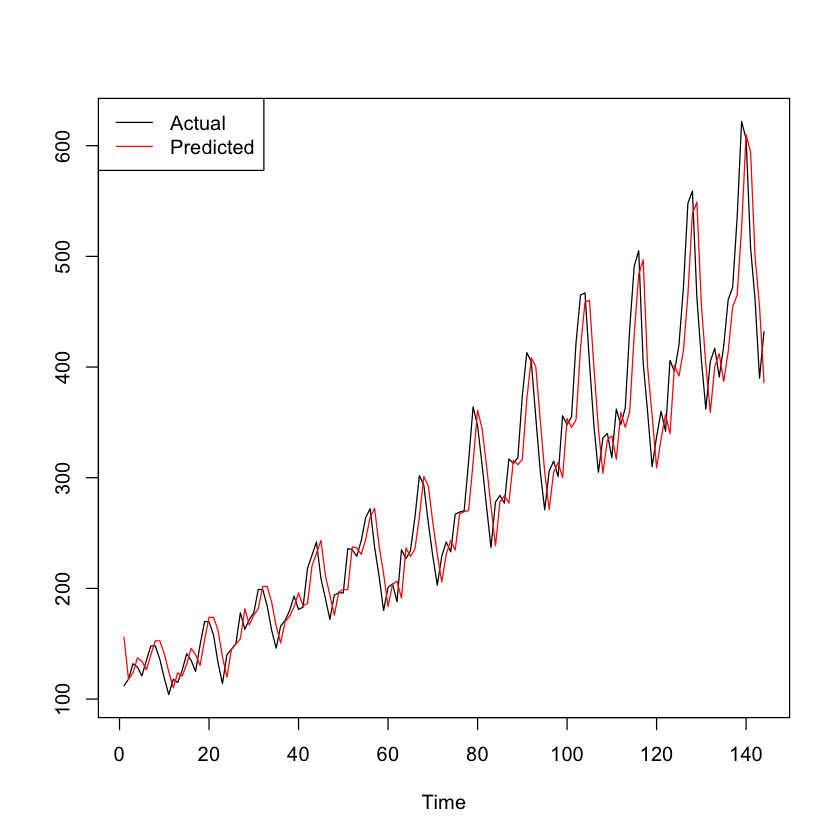

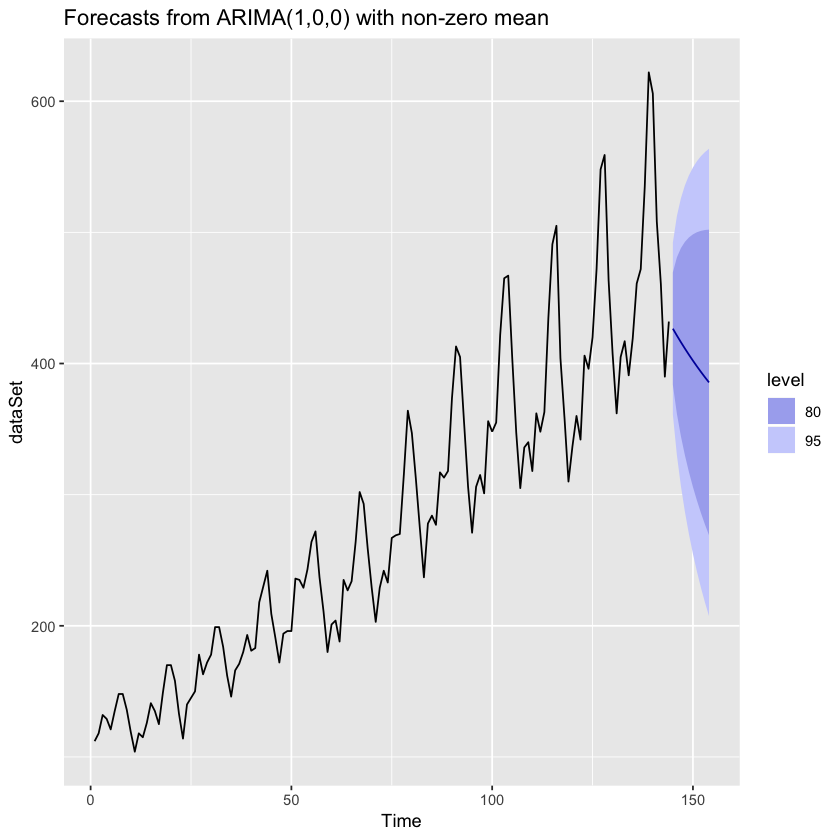

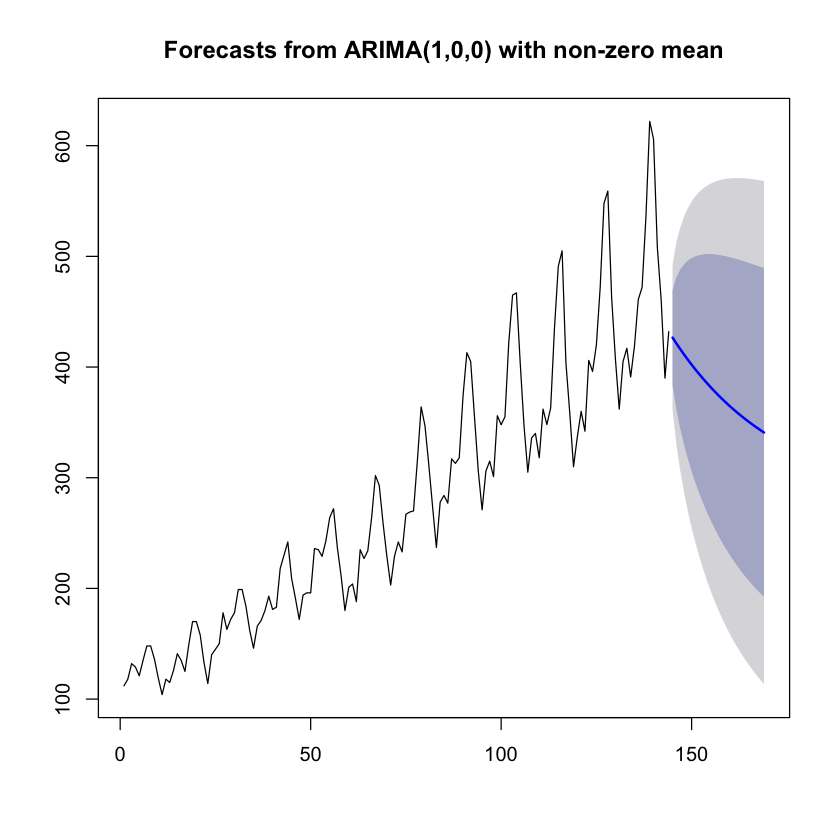

In [20]:
# ARIMA Model 
fit_arima  <- arima(dataSet,  order = c(1,0,0), optim.method = "BFGS", method = "CSS-ML") #"CSS-ML", "ML", "CSS"
checkresiduals(fit_arima) 

# Calculate R squared value : r2
r2 <- cor(fitted(fit_arima),  dataSet)^2;  print(r2)

x <- dataSet            # actual
y <- fitted(fit_arima)  # predicted
# plot actual vs predicted
ts.plot(x, y, 
        gpars = list(col = c("black", "red")))
legend("topleft", legend = c("Actual", "Predicted"), col = c("black", "red"), lty = 1)

# Plotting Observed and Predicted with CI
forecast <- forecast:::forecast.Arima(fit_arima, h = 25)
print(forecast); autoplot(forecast(fit_arima))
plot(forecast)